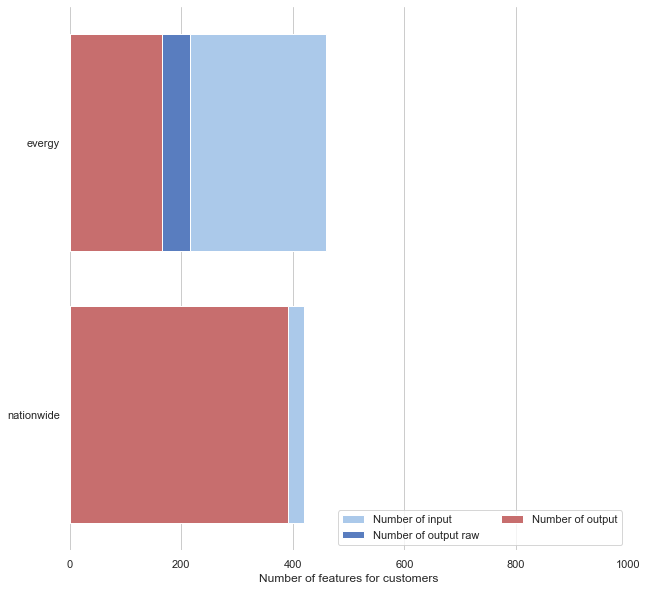

In [20]:
#### Option 1 ####
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

customers = ['evergy', 'nationwide']
customer_data = []
# customer = 'evergy'
for customer in customers:
    df_output_raw = pd.read_csv(f'../../data/{customer}/impact_values_pl.csv', sep=';')
    df_input = pd.read_csv(f'../../data/{customer}/input.csv', sep=';')
    df_output = pd.read_csv(f'../../data/{customer}/output.csv', sep=';')

    number_df_input = df_input.shape[0]
    number_output_raw = df_output_raw.shape[0]
    number_output = df_output.shape[0]
    customer_data.append([customer, number_df_input, number_output_raw, number_output])

df = pd.DataFrame(customer_data, columns=['customer_name', 'number_df_input', 'number_output_raw', 'number_output'])
df = df.sort_values("number_df_input", ascending=False)


# Plot the total # input
sns.set_color_codes("pastel")
sns.barplot(x="number_df_input", y="customer_name", data=df,
            label="Number of input", color="b")

# Plot the total # output raw
sns.set_color_codes("muted")
sns.barplot(x="number_output_raw", y="customer_name", data=df,
            label="Number of output raw", color="b")

# Plot the total number NaN removed 
sns.set_color_codes("muted")
sns.barplot(x="number_output", y="customer_name", data=df,
            label="Number of output", color="r")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1000), ylabel="",
    xlabel="Number of features for customers")
sns.despine(left=True, bottom=True)


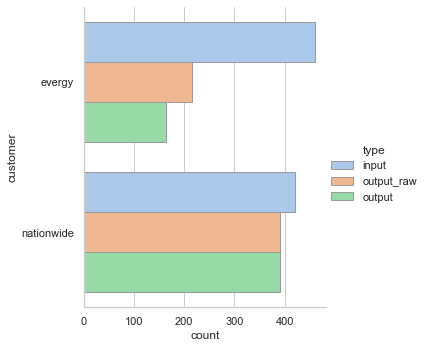

In [28]:
#### Option 2 ####

from re import L
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

customers = ['evergy', 'nationwide']
frames = []
for customer in customers:
    df_output_raw = pd.read_csv(f'../../data/{customer}/impact_values_pl.csv', sep=';')
    df_input = pd.read_csv(f'../../data/{customer}/input.csv', sep=';')
    df_output = pd.read_csv(f'../../data/{customer}/output.csv', sep=';')

    df_output_raw['type'] = 'output_raw'
    df_input['type'] = 'input'
    df_output['type'] = 'output'

    df_output_raw['customer'] = customer
    df_input['customer'] = customer
    df_output['customer'] = customer

    frames.append(df_input)
    frames.append(df_output_raw)
    frames.append(df_output)

df = pd.concat(frames)
sns.catplot(y="customer", hue="type", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

